In [ ]:
! pip install -U diffusers transformers datasets accelerate bitsandbytes peft


In [ ]:
!export MODEL_NAME="CompVis/stable-diffusion-v1-4"
!export DATASET_NAME="hahminlew/kream-product-blip-captions"
!export OUTPUT_DIR="DGM_project/sd14_lora_finetune"


In [ ]:
!accelerate launch train_text_to_image_lora.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" \
  --dataset_name="hahminlew/kream-product-blip-captions" \
  --resolution=512 \
  --center_crop \
  --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=2501 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --resume_from_checkpoint="DGM_project\sdxl_lora_finetune\checkpoint-2000" \
  --output_dir="DGM_project/sdxl_lora_finetune" \
  --logging_dir="logs" 


In [2]:
from diffusers import StableDiffusionPipeline
from diffusers.loaders import AttnProcsLayers
import torch

base_model_id = "CompVis/stable-diffusion-v1-4"


pipe = StableDiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16).to("cuda")
pipe.load_lora_weights("DGM_project/sdxl_lora_finetune", weight_name="pytorch_lora_weights.safetensors")

C:\Users\prite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:12<00:00,  1.76s/it]
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


100%|██████████| 50/50 [00:05<00:00,  8.62it/s]


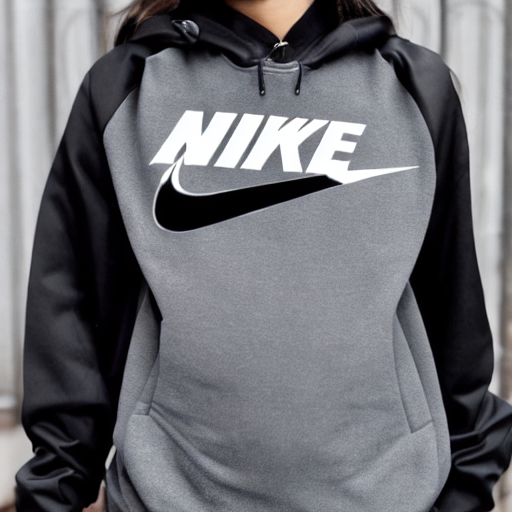

In [5]:
prompt = "A Person wearing a black nike jacket -  with a logo on the chest with clear backgroud and the person is like fashion model and standing in stylish way"

pipe(prompt, num_inference_steps=50, guidance_scale=8.5).images[0]

100%|██████████| 60/60 [00:07<00:00,  7.73it/s]


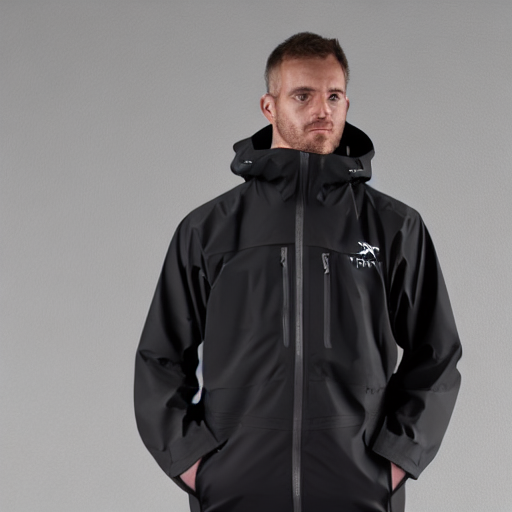

In [32]:
prompt = "outer, Arc'teryx Beta LT Jacket Black, a photography of a black jacket with a hood on"
pipe(prompt, num_inference_steps=60, guidance_scale=10).images[0]

100%|██████████| 80/80 [00:10<00:00,  7.84it/s]


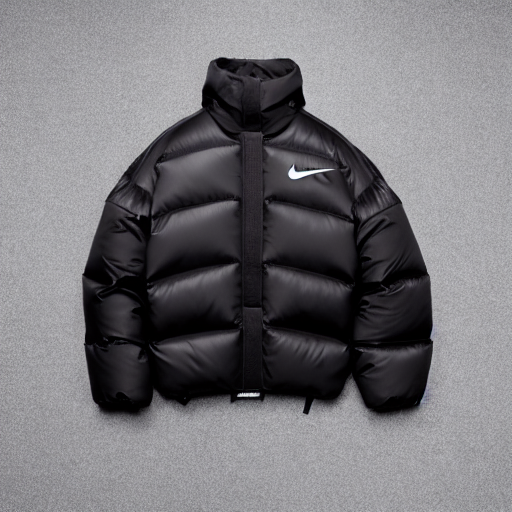

In [15]:
prompt = "outer, The Nike x Balenciaga Down Jacket Black, a photography of a black down jacket with a logo on the chest."
pipe(prompt, num_inference_steps=80, guidance_scale=12).images[0]

In [ ]:
prompt = "A Person wearing a black nike jacket -  with a logo on the chest with clear backgroud and the person is like fashion model and standing in stylish way"

image = pipe(prompt, num_inference_steps=60, guidance_scale=10).images[0]

# Show image
image

# Print basic info
print(image.format, image.size, image.mode)

100%|██████████| 60/60 [00:10<00:00,  5.63it/s]


None (512, 512) RGB


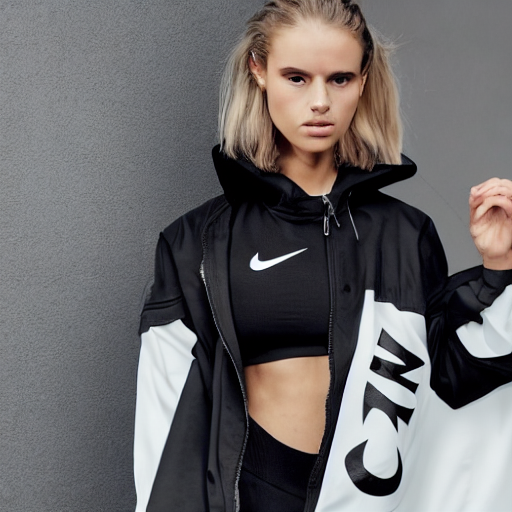

In [13]:
image

## Upscaler


100%|██████████| 75/75 [00:09<00:00,  7.74it/s]


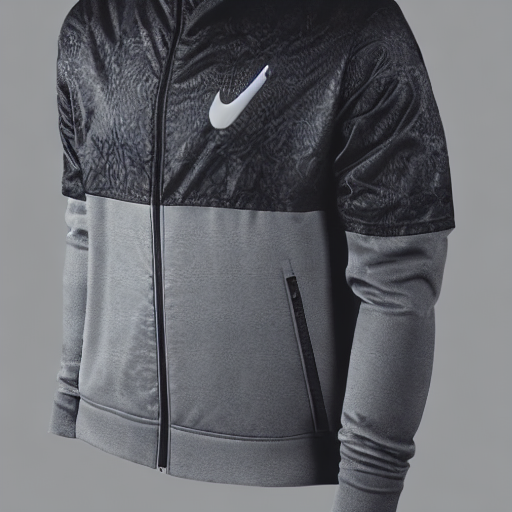

In [21]:
low_res_image = image.convert("RGB").resize((128, 128))

# Perform upscaling
upscaled_image = pipe(prompt="a detailed photo of nike Jacket",
                      image=low_res_image,
                      num_inference_steps=75,
                      guidance_scale=9.0).images[0]
upscaled_image

## inpainting

In [ ]:
pip install diffusers --upgrade

Loading pipeline components...: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
100%|██████████| 50/50 [03:13<00:00,  3.87s/it]


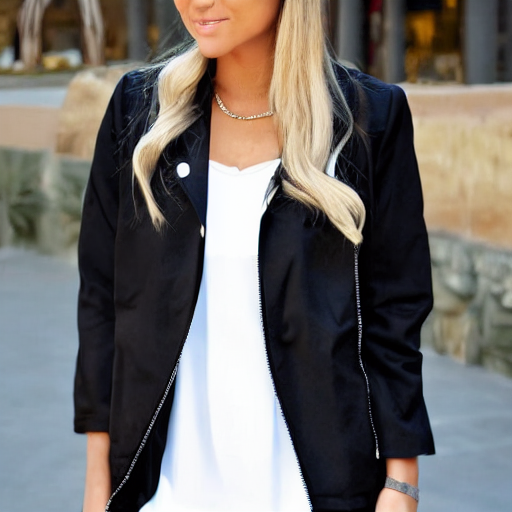

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import numpy as np


# base_model_id = "CompVis/stable-diffusion-v1-4"

base_model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"

inpipe = StableDiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16).to("cuda")

inpipe.load_lora_weights("DGM_project/sdxl_lora_finetune", weight_name="pytorch_lora_weights.safetensors")


# Load original image
original = Image.open("example.png").convert("RGB")

# Create a mask image where white = area to inpaint
mask = Image.new("L", original.size, 0)
mask.paste(255, (50, 50, 300, 300)) 
# Inpaint
inpainted = inpipe(prompt="A stylish black jacket", image=original, mask_image=mask).images[0]

inpainted